<a href="https://colab.research.google.com/github/KakarlaSanthipriya/Lung_Cancer_Detection_using_CNN/blob/main/Lung_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_images_from_dir(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (128, 128))
                images.append(img)
                labels.append(label)
    return images, labels

In [ ]:
benign_dir = "/content/drive/MyDrive/Lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases"
malignant_dir = "/content/drive/MyDrive/Lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases"
normal_dir = "/content/drive/MyDrive/Lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases"

In [ ]:
benign_images, benign_labels = load_images_from_dir(benign_dir, label=0)
malignant_images, malignant_labels = load_images_from_dir(malignant_dir, label=1)
normal_images, normal_labels = load_images_from_dir(normal_dir, label=2)


In [ ]:
images = benign_images + malignant_images + normal_images
labels = benign_labels + malignant_labels + normal_labels

In [ ]:
num_images = len(images)
num_labels = len(labels)

print(f"Number of images: {num_images}")
print(f"Number of labels: {num_labels}")

Number of images: 1097
Number of labels: 1097


In [ ]:
images = np.array(images)
labels = np.array(labels)

In [ ]:
print("Class distribution before oversampling:", Counter(labels))

Class distribution before oversampling: Counter({1: 561, 2: 416, 0: 120})


In [ ]:
import pandas as pd
import plotly.express as px

count_data = pd.DataFrame({
    "label": ["Benign", "Malignant", "Normal"],
    "count": [len(benign_images), len(malignant_images), len(normal_images)]
})

fig = px.histogram(data_frame=count_data, x="label", y="count", color="label")

fig.show()

In [ ]:
# Reshape images for oversampling
images_reshaped = images.reshape(len(images), -1)

In [ ]:
oversampler = RandomOverSampler(random_state=42)
images_resampled, labels_resampled = oversampler.fit_resample(images_reshaped, labels)

In [ ]:
images_resampled = images_resampled.reshape(-1, 128, 128)

In [ ]:
num_images = len(images_resampled)
num_labels = len(labels_resampled)

print(f"Number of images: {num_images}")
print(f"Number of labels: {num_labels}")

Number of images: 1683
Number of labels: 1683


In [ ]:
print("Class distribution after oversampling:", Counter(labels_resampled))

Class distribution after oversampling: Counter({0: 561, 1: 561, 2: 561})


In [ ]:
import pandas as pd
import plotly.express as px

count_data_resampled = pd.DataFrame({
    "label": ["Benign", "Malignant", "Normal"],
    "count": [np.sum(labels_resampled == 0), np.sum(labels_resampled == 1), np.sum(labels_resampled == 2)]
})

fig = px.histogram(data_frame=count_data_resampled, x="label", y="count", color="label")
fig.show()

In [ ]:
images_resampled = images_resampled / 255.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images_resampled, labels_resampled, test_size=0.2, random_state=42)

In [ ]:
print(f"Number of training images: {X_train.shape[0]}")
print(f"Number of testing images: {X_test.shape[0]}")

Number of training images: 1346
Number of testing images: 337


In [ ]:
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
X_train = X_train.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

In [ ]:
history = model.fit(
    X_train, y_train_encoded,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test_encoded)
)


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.4206 - loss: 1.1183 - val_accuracy: 0.6944 - val_loss: 0.8274
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.6470 - loss: 0.7807 - val_accuracy: 0.7774 - val_loss: 0.4722
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8886 - loss: 0.3408 - val_accuracy: 0.9021 - val_loss: 0.2832
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9289 - loss: 0.2050 - val_accuracy: 0.9644 - val_loss: 0.0869
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9717 - loss: 0.0831 - val_accuracy: 0.9674 - val_loss: 0.0758
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9846 - loss: 0.0478 - val_accuracy: 0.9822 - val_loss: 0.0362
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9902 - loss: 0.0314 - val_accuracy: 0.9881 - val_loss: 0.0280
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9954 - loss: 0.0197 - val_accuracy: 0.9911 - val_loss:

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def history_plot(history):
    epochs = len(history.history['accuracy'])
    fig1 = make_subplots()
    fig1.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["accuracy"], name="Training Accuracy"))
    fig1.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["val_accuracy"], name="Validation Accuracy"))
    fig1.update_layout(title="Training and Validation Accuracy", xaxis_title="Epoch", yaxis_title="Accuracy")
    fig1.show()

    fig2 = make_subplots()
    fig2.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["loss"], name="Training Loss"))
    fig2.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["val_loss"], name="Validation Loss"))
    fig2.update_layout(title="Training and Validation Loss", xaxis_title="Epoch", yaxis_title="Loss")
    fig2.show()

history_plot(history)

In [ ]:
y_pred = model.predict(X_test.reshape(-1, 128, 128, 1))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

report = classification_report(y_true_classes, y_pred_classes, target_names=['Benign', 'Malignant', 'Normal'])
print(report)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 254ms/step
              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99       106
   Malignant       1.00      1.00      1.00       125
      Normal       1.00      0.98      0.99       106

    accuracy                           0.99       337
   macro avg       0.99      0.99      0.99       337
weighted avg       0.99      0.99      0.99       337



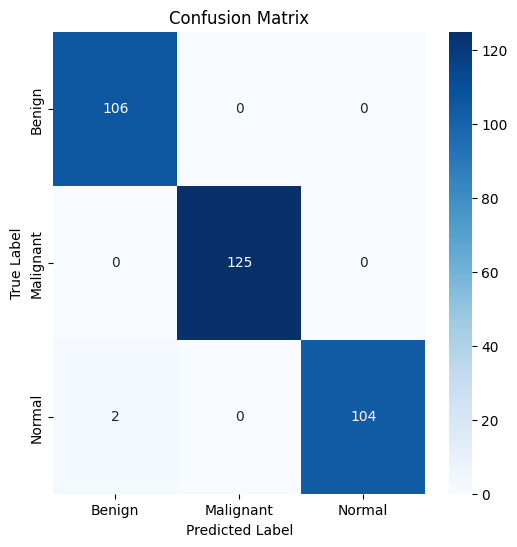

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant', 'Normal'], yticklabels=['Benign', 'Malignant', 'Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step


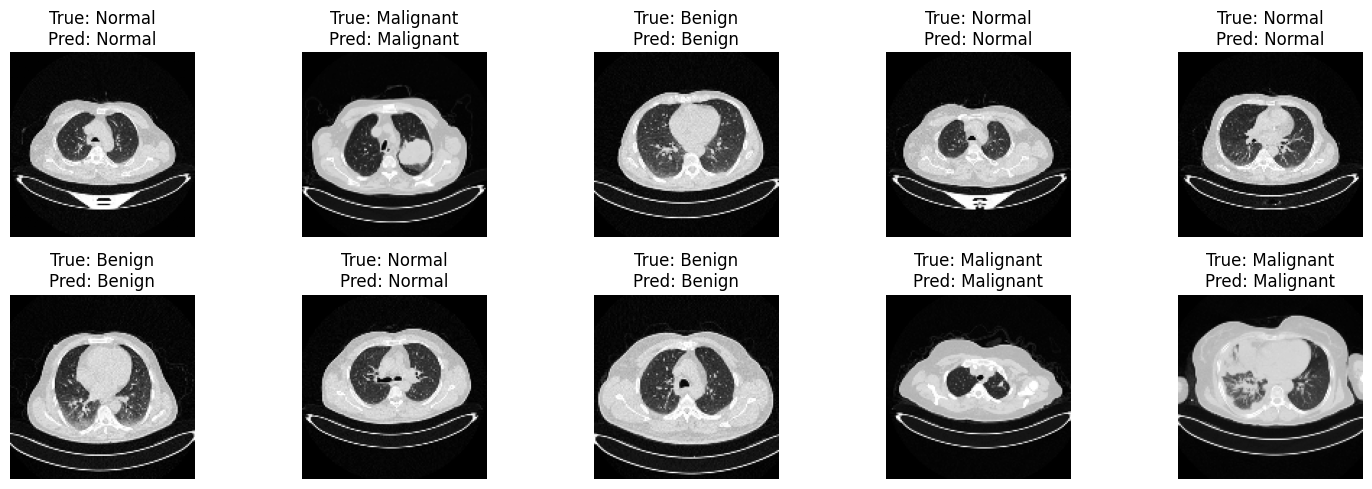

In [ ]:
import random
import matplotlib.pyplot as plt

def show_correctly_classified_images(X_test, y_true_classes, y_pred_classes, class_names, num_images=10):

    correct_indices = np.where(y_true_classes == y_pred_classes)[0]

    if len(correct_indices) == 0:
        print("No correctly classified images found.")
        return

    random.shuffle(correct_indices)
    selected_indices = correct_indices[:num_images]

    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(selected_indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_test[idx].reshape(128, 128), cmap="gray")
        true_label = class_names[y_true_classes[idx]]
        pred_label = class_names[y_pred_classes[idx]]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

class_names = ['Benign', 'Malignant', 'Normal']

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

show_correctly_classified_images(X_test, y_true_classes, y_pred_classes, class_names, num_images=10)